Exploration des données


In [ ]:
import pandas as pd
import numpy as np

# Charger les données à partir d'un fichier CSV
file_path = 'filtered_data.csv'
df = pd.read_csv(file_path)

# Afficher un aperçu des données
df.head()

,Country,Year,"Total Population, as of 1 January (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),Population Growth Rate (percentage),Births (thousands),Births by women aged 15 to 19 (thousands),Total Fertility Rate (live births per woman),Mean Age Childbearing (years),...,"Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)"
0,Burundi,1950,2229.322,28.627,51.232,2.272,117.211,11.582,6.923,30.674,...,444.227,614.352,639.661,590.518,290.807,309.954,273.270,423.970,454.751,395.920
1,Burundi,1951,2280.554,27.581,50.384,2.185,118.043,11.668,6.914,30.674,...,439.498,610.436,636.943,585.391,288.479,308.601,270.021,421.038,453.082,391.799
2,Burundi,1952,2330.938,26.922,49.732,2.111,118.830,11.750,6.900,30.676,...,435.904,607.141,634.070,581.696,286.669,307.120,267.899,418.773,451.245,389.151
3,Burundi,1953,2380.670,26.593,49.033,2.039,120.089,11.887,6.915,30.677,...,432.679,603.648,630.348,578.471,284.712,304.927,266.165,416.309,448.483,387.006
4,Burundi,1954,2429.703,26.209,49.767,2.028,121.062,12.011,6.917,30.679,...,429.470,600.680,627.641,575.264,283.199,303.610,264.461,414.421,446.853,384.896


In [2]:
# Conversion des types de données
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Impossible de convertir la colonne {col} en numérique")
            

# Imputation des valeurs manquantes
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Vérification finale
print("Valeurs manquantes après traitement :\n", df.isnull().sum())


Impossible de convertir la colonne Country en numérique
Valeurs manquantes après traitement :
 Country                                                                                           0
Year                                                                                              0
Total Population, as of 1 January (thousands)                                                     0
Rate of Natural Change (per 1,000 population)                                                     0
Population Change (thousands)                                                                     0
Population Growth Rate (percentage)                                                               0
Births (thousands)                                                                                0
Births by women aged 15 to 19 (thousands)                                                         0
Total Fertility Rate (live births per woman)                                                      0
Mean 

Statistiques descriptives

In [3]:

# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calculer les statistiques descriptives pour les colonnes numériques
stats_numeric = df_numeric.describe()
print("Statistiques descriptives des colonnes numériques :\n", stats_numeric)

# Calcul de statistiques supplémentaires
mean_values = df_numeric.mean()
median_values = df_numeric.median()
std_dev_values = df_numeric.std()

print("\nMoyennes des colonnes numériques :\n", mean_values)
print("\nMédianes des colonnes numériques :\n", median_values)
print("\nÉcarts-types des colonnes numériques :\n", std_dev_values)


Statistiques descriptives des colonnes numériques :
                Year  Total Population, as of 1 January (thousands)  \
count  17538.000000                                   1.753800e+04   
mean    1986.500000                                   2.137368e+04   
std       21.360618                                   9.515048e+04   
min     1950.000000                                   5.000000e-01   
25%     1968.000000                                   2.170327e+02   
50%     1986.500000                                   3.109365e+03   
75%     2005.000000                                   1.081445e+04   
max     2023.000000                                   1.431703e+06   

       Rate of Natural Change (per 1,000 population)  \
count                                   17538.000000   
mean                                       17.537752   
std                                        11.219175   
min                                      -105.925000   
25%                                 

Évolution de la population au fil du temps

In [4]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Supposons que df est ton DataFrame avec les colonnes 'Year' et 'Total Population, as of 1 January (thousands)'
global_population = df.groupby('Year')['Total Population, as of 1 January (thousands)'].sum().reset_index()

# Créer la figure de base
fig = make_subplots(rows=1, cols=1)

# Ajouter les données comme points de taille variable (cercles)
trace = go.Scatter(
    x=global_population['Year'],
    y=global_population['Total Population, as of 1 January (thousands)'],
    mode='markers',
    marker=dict(
        size=global_population['Total Population, as of 1 January (thousands)'] / 50000,  # Ajuste la taille des cercles (facteur modifié)
        color=global_population['Total Population, as of 1 January (thousands)'],
        colorscale='Viridis',  # Choix des couleurs
        showscale=True
    ),
    name="Population mondiale"
)

fig.add_trace(trace)

# Mise en place de l'animation
frames = []

for year in global_population['Year']:
    frame = go.Frame(
        data=[go.Scatter(
            x=global_population[global_population['Year'] <= year]['Year'],
            y=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'],
            mode='markers',
            marker=dict(
                size=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'] / 50000,  # Augmenter la taille des cercles
                color=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'],
                colorscale='Viridis',
                showscale=True
            )
        )],
        name=f"Année {year}"
    )
    frames.append(frame)

fig.frames = frames

# Ajouter des boutons pour jouer l'animation
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        x=0.1,
        xanchor="right",
        y=0,
        yanchor="bottom",
        buttons=[dict(
            label="Play",
            method="animate",
            args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True, mode="immediate")]
        )]
    )],
    title="Animation de la Population Mondiale au Fil des Années",
    xaxis=dict(title='Année'),
    yaxis=dict(title='Population Totale (milliers)', range=[0, global_population['Total Population, as of 1 January (thousands)'].max() * 1.1]),
)

# Afficher le graphique
fig.show()


Taux de natalité et taux de mortalité au fil du temps

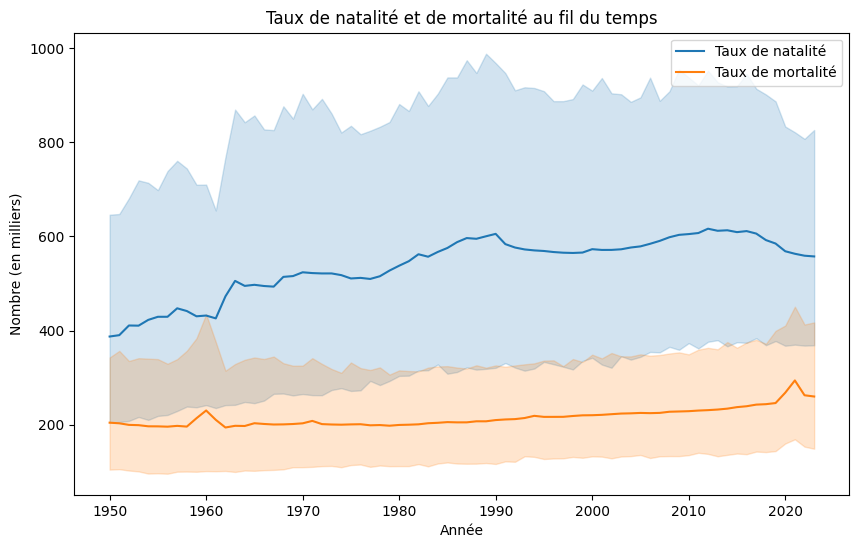

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Taux de natalité
sns.lineplot(data=df, x='Year', y='Births (thousands)', label='Taux de natalité')
# Taux de mortalité
sns.lineplot(data=df, x='Year', y='Total Deaths (thousands)', label='Taux de mortalité')

plt.title("Taux de natalité et de mortalité au fil du temps")
plt.xlabel("Année")
plt.ylabel("Nombre (en milliers)")
plt.legend()
plt.show()


Matrice de Corrélation

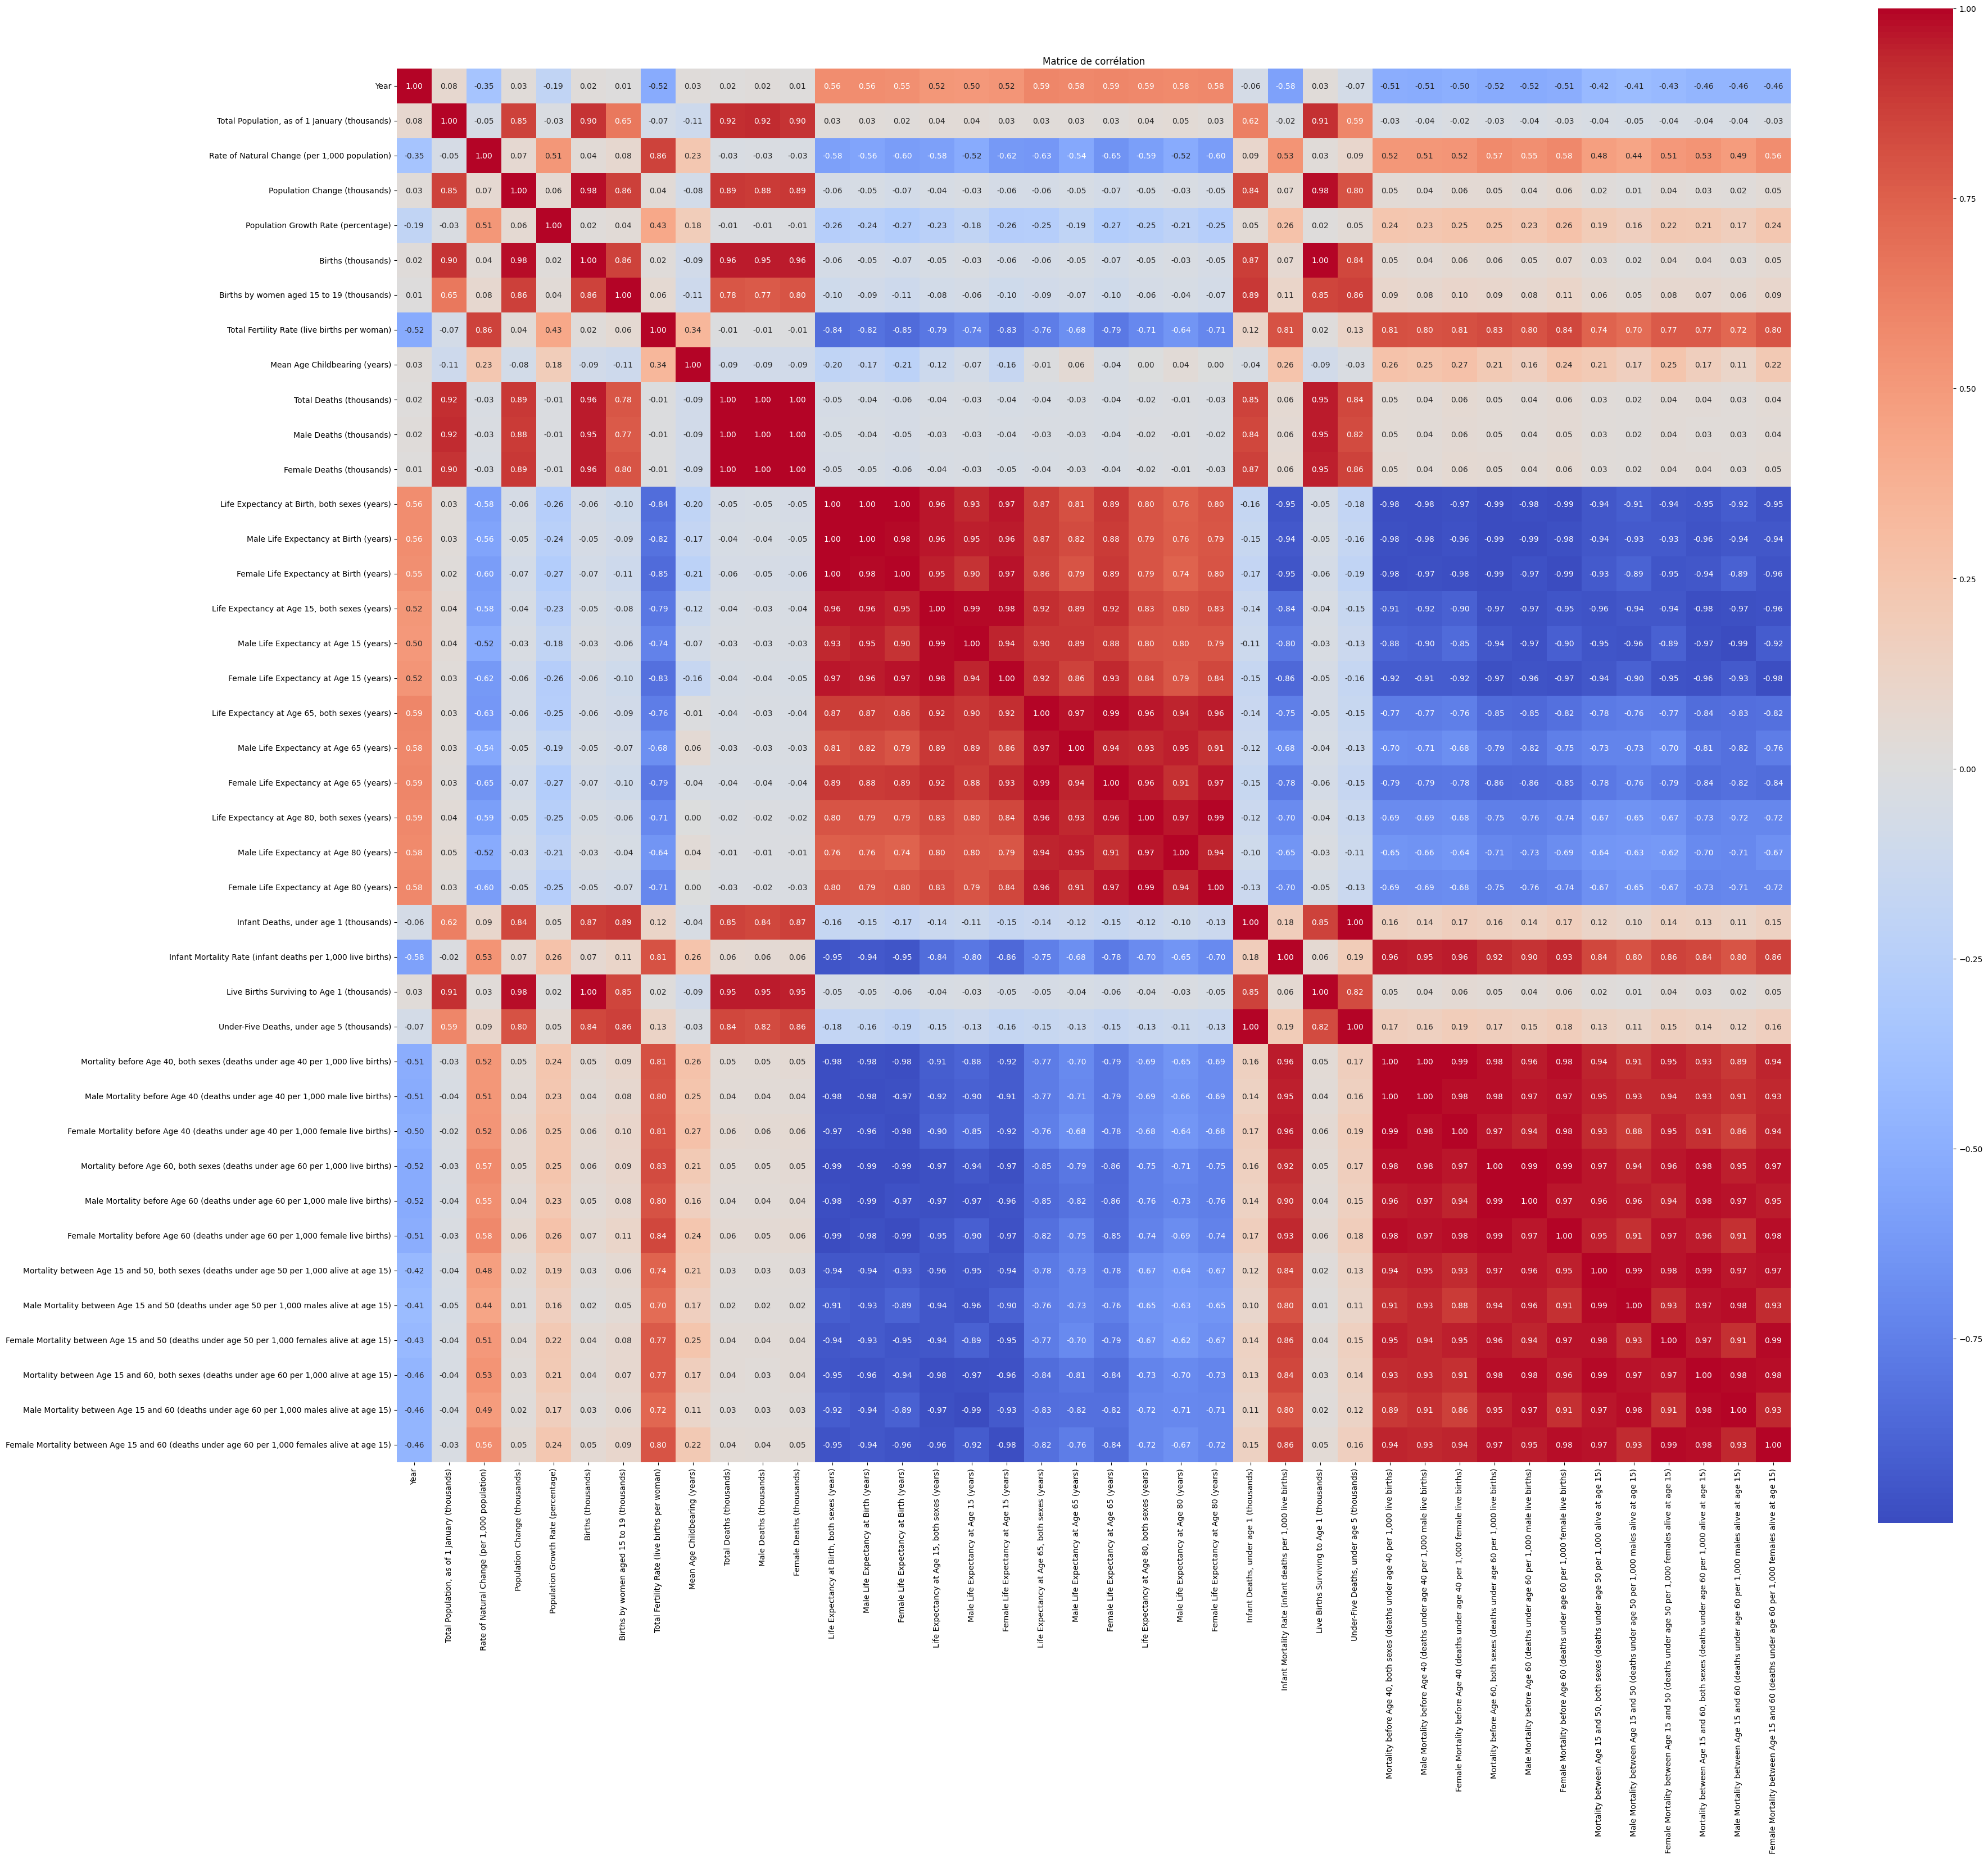

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]
plt.figure(figsize=(40, 35))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation")
plt.show()

PCA

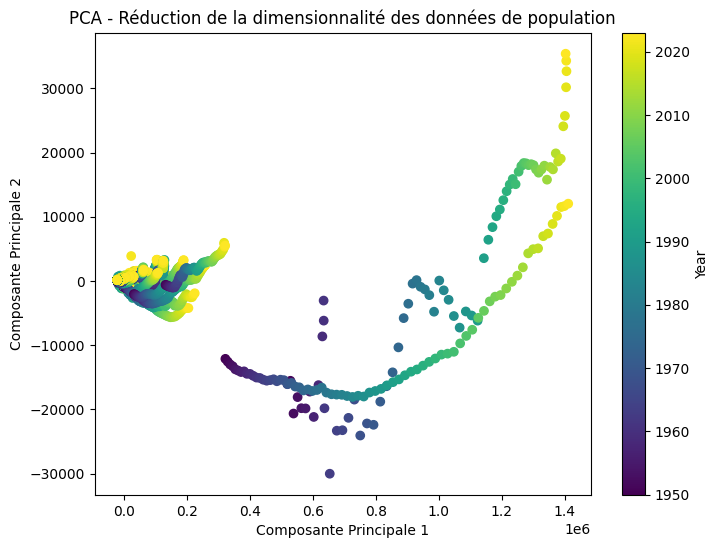

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
pca = PCA(n_components=2)
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
pca_result = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('PCA - Réduction de la dimensionnalité des données de population')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

Distribution de l'espérance de vie

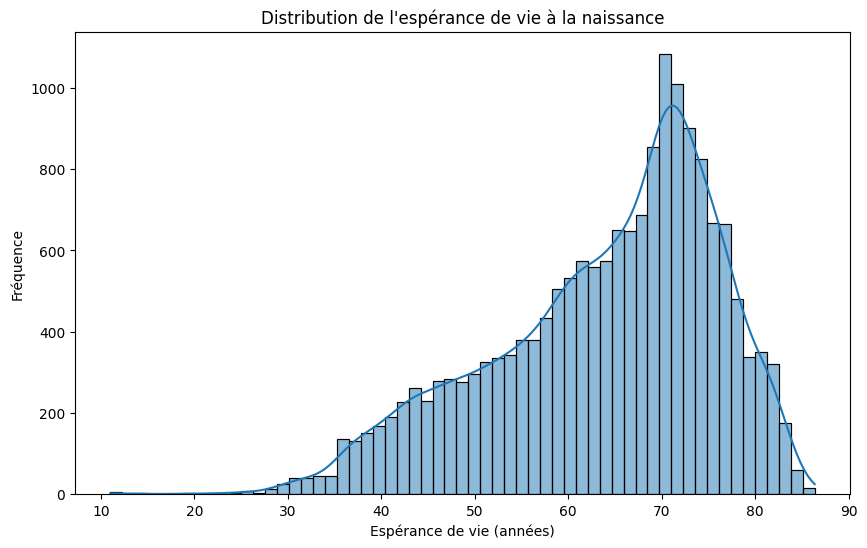

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Expectancy at Birth, both sexes (years)'], kde=True)
plt.title("Distribution de l'espérance de vie à la naissance")
plt.xlabel("Espérance de vie (années)")
plt.ylabel("Fréquence")
plt.show()


une distribution unimodale de l'espérance de vie à la naissance, avec une concentration élevée autour de 70 ans. Cela indique que la majorité de la population a une espérance de vie autour de cette valeur.
La distribution est asymétrique, légèrement étalée vers la gauche, ce qui suggère une minorité de personnes ayant une espérance de vie inférieure à la moyenne.

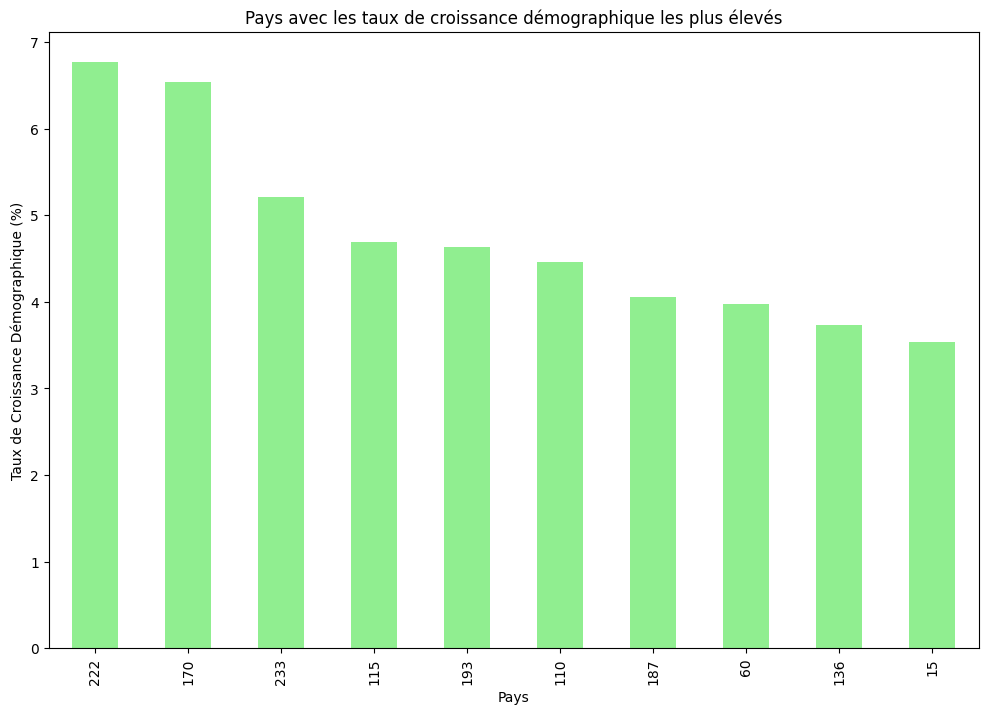

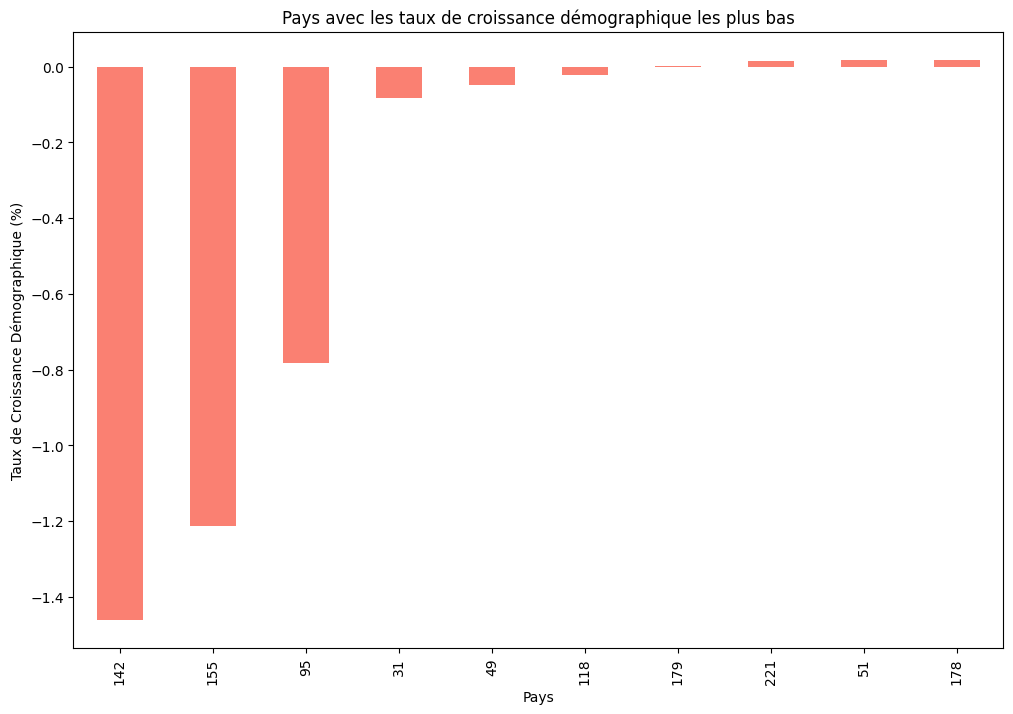

In [12]:
# Calcul du taux de croissance démographique pour chaque pays
growth_rate_by_country = df.groupby('Country')['Population Growth Rate (percentage)'].mean()

# Affichage des pays ayant les taux de croissance les plus élevés et les plus bas
growth_rate_by_country.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 8), color='lightgreen', title='Pays avec les taux de croissance démographique les plus élevés')
plt.xlabel('Pays')
plt.ylabel('Taux de Croissance Démographique (%)')
plt.show()

growth_rate_by_country.sort_values().head(10).plot(kind='bar', figsize=(12, 8), color='salmon', title='Pays avec les taux de croissance démographique les plus bas')
plt.xlabel('Pays')
plt.ylabel('Taux de Croissance Démographique (%)')
plt.show()


** Clustering des pays par le profil de santé avec la méthode DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Sélection des variables de santé pertinentes
health_variables = [
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Total Fertility Rate (live births per woman)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
    'Life Expectancy at Age 65, both sexes (years)'
]

# Sélectionner les données numériques pour ces variables
health_data = df[health_variables]

# Remplissage des valeurs manquantes avec la médiane
cleaned_health_data = health_data.fillna(health_data.median())

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_health_data)

# Appliquer DBSCAN
eps = 0.5  
dbscan = DBSCAN(eps=eps, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
df['Health Cluster'] = clusters

Sans reduction

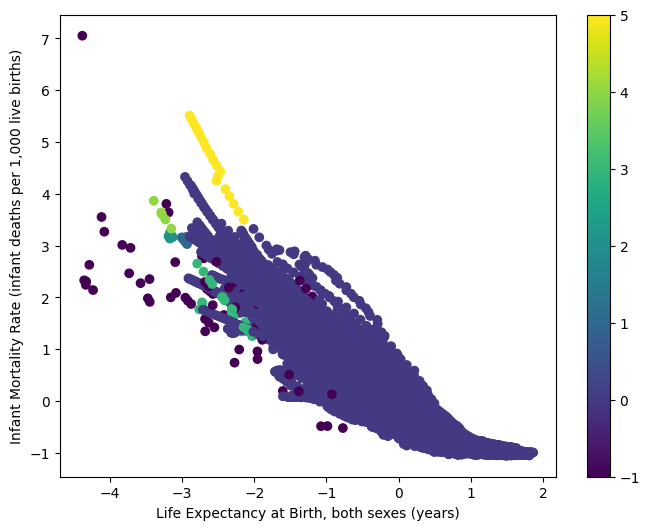

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(health_variables[0])
plt.ylabel(health_variables[1])
plt.show()

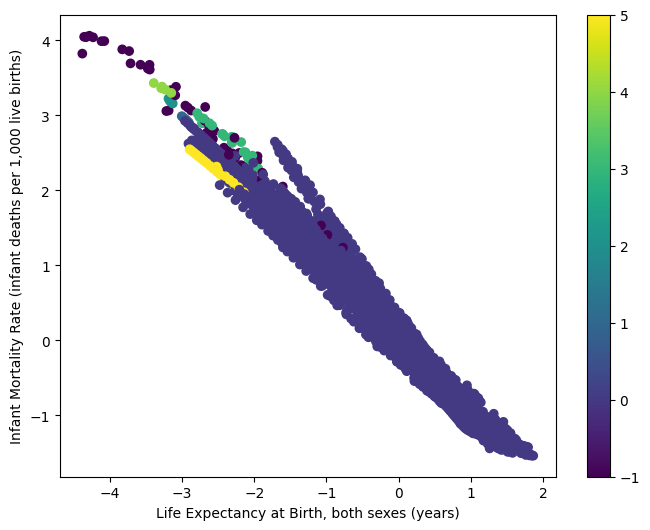

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(health_variables[0])
plt.ylabel(health_variables[1])
plt.show()

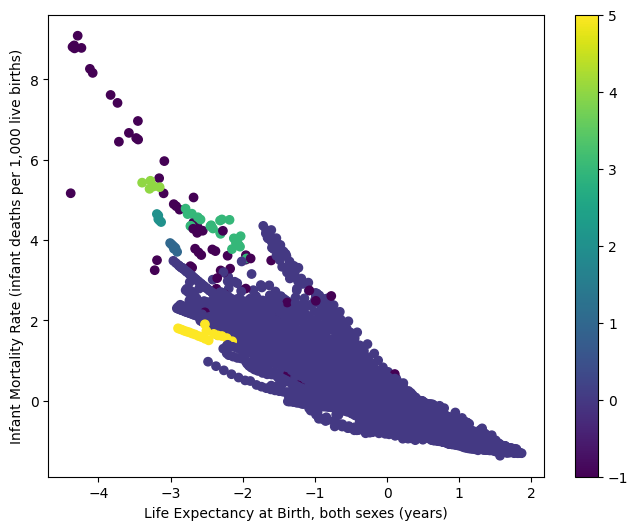

In [16]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(health_variables[0])
plt.ylabel(health_variables[1])
plt.show()

Avec reduction

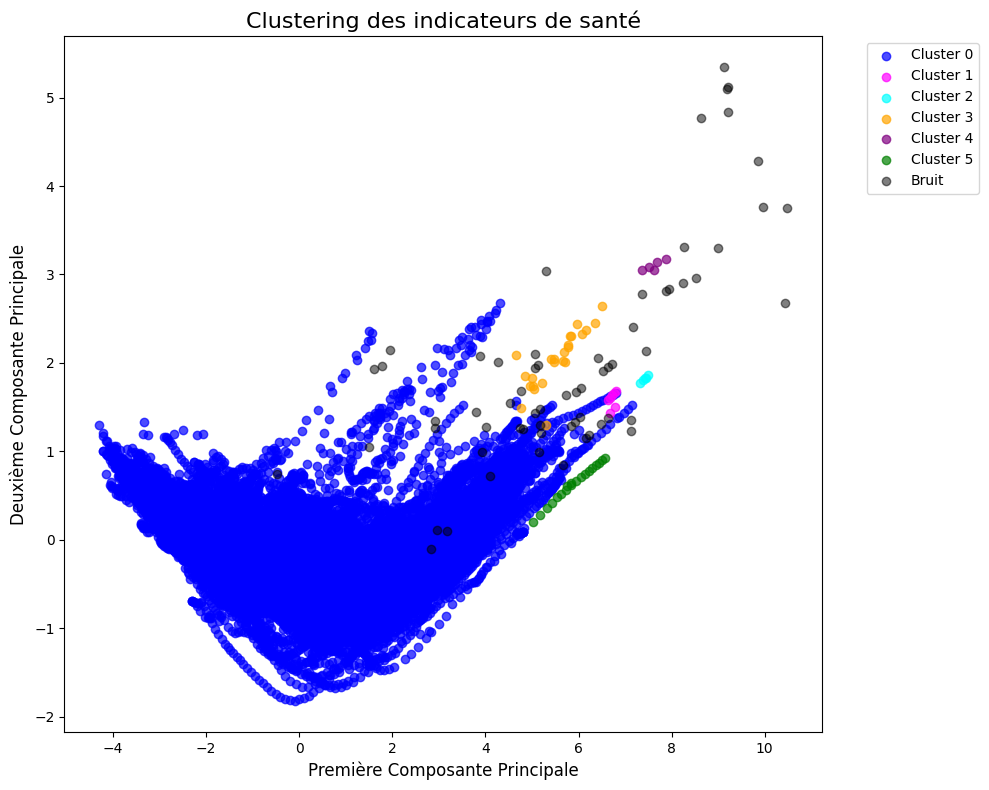

In [18]:

# Visualiser les clusters avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Palette de couleurs distinctes
distinct_colors = [
    '#FF0000', '#0000FF', '#FF00FF', '#00FFFF',
    '#FFA500', '#800080', '#008000', '#000080', '#FFC0CB',
    '#A52A2A', '#808080'
]

plt.figure(figsize=(10, 8))

# Tracer chaque cluster avec une couleur distincte
unique_clusters = np.unique(clusters)
for i, cluster in enumerate(unique_clusters):
    if cluster != -1:  # Exclure les points de bruit
        mask = clusters == cluster
        color = distinct_colors[i % len(distinct_colors)]
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label=f'Cluster {cluster}', alpha=0.7)

# Tracer les points de bruit en noir
if -1 in clusters:
    noise_mask = clusters == -1
    plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], c='black', label='Bruit', alpha=0.5)

plt.title("Clustering des indicateurs de santé", fontsize=16)
plt.xlabel("Première Composante Principale", fontsize=12)
plt.ylabel("Deuxième Composante Principale", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [10]:
# Afficher les statistiques pour chaque cluster
print("Statistiques des clusters :")
for cluster in unique_clusters:
    if cluster != -1:  # Exclure les points de bruit
        cluster_data = df[df['Health Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(cluster_data[health_variables].mean())
        print("\nNombre de régions dans ce cluster :", len(cluster_data))

Statistiques des clusters :

Cluster 0:
Life Expectancy at Birth, both sexes (years)                                                    64.096254
Infant Mortality Rate (infant deaths per 1,000 live births)                                     55.072864
Total Fertility Rate (live births per woman)                                                     3.957898
Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)                293.328069
Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)    131.339065
Life Expectancy at Age 65, both sexes (years)                                                   13.993455
dtype: float64

Nombre de régions dans ce cluster : 17414

Cluster 1:
Life Expectancy at Birth, both sexes (years)                                                    28.187286
Infant Mortality Rate (infant deaths per 1,000 live births)                                    217.775857
Total Fertility Rate (live births per woma

** Clustering des pays par le profil de santé avec la méthode  K-means**

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Sélection des variables de santé pertinentes
health_variables = [
    'Life Expectancy at Birth, both sexes (years)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Total Fertility Rate (live births per woman)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
    'Life Expectancy at Age 65, both sexes (years)'
]

# Sélectionner les données numériques pour ces variables
health_data = df[health_variables]

# Remplissage des valeurs manquantes avec la médiane
cleaned_health_data = health_data.fillna(health_data.median())

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cleaned_health_data)

/home/aida/anaconda3/envs/torchenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aida/anaconda3/envs/torchenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aida/anaconda3/envs/torchenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aida/anaconda3/envs/torchenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

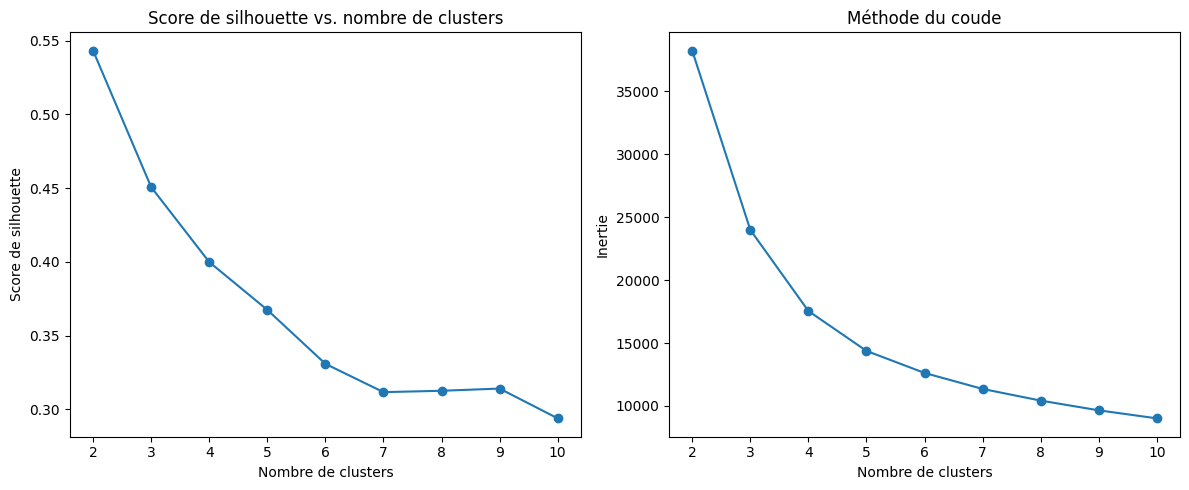

In [20]:
# Déterminer le nombre optimal de clusters
max_clusters = 10
silhouette_scores = []
inertias = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    inertias.append(kmeans.inertia_)

# Tracer les scores de silhouette et l'inertie
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette vs. nombre de clusters')

plt.subplot(122)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')

plt.tight_layout()
plt.show()

In [21]:
optimal_clusters = 4 

# Appliquer K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters au DataFrame
df['Health Cluster'] = clusters


/home/aida/anaconda3/envs/torchenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sans réduction

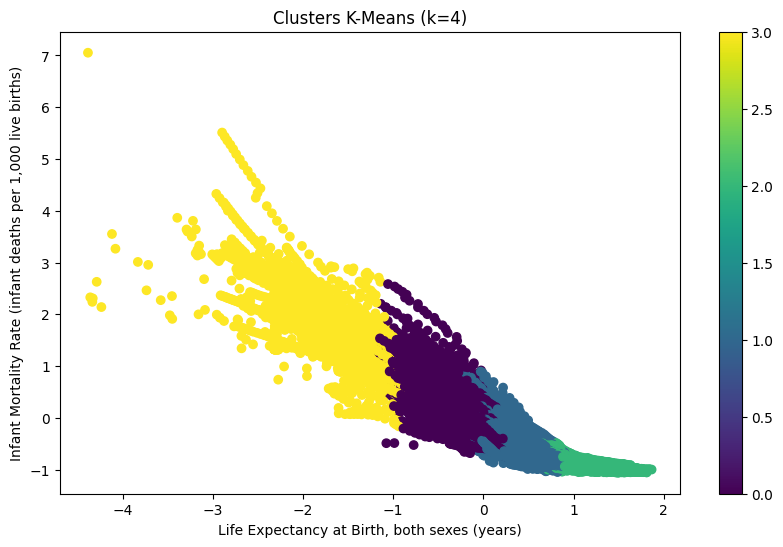

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(health_variables[0])
plt.ylabel(health_variables[1])
plt.title(f'Clusters K-Means (k={optimal_clusters})')
plt.show()

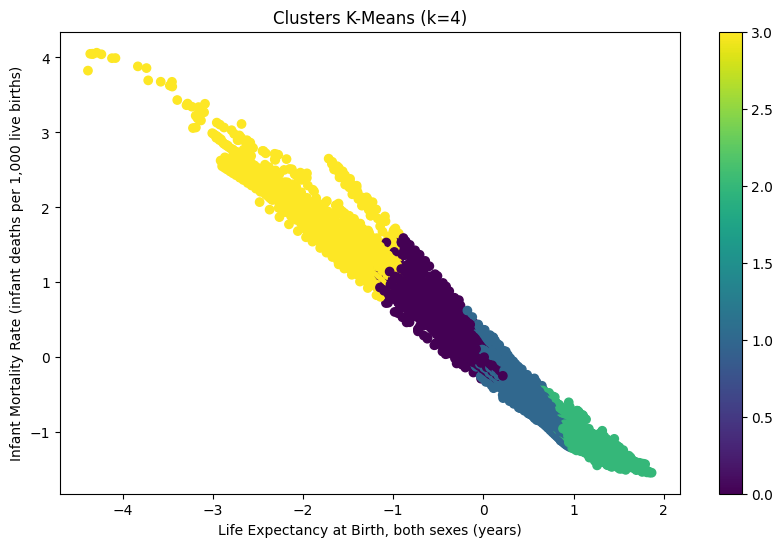

In [26]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 3], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(health_variables[0])
plt.ylabel(health_variables[1])
plt.title(f'Clusters K-Means (k={optimal_clusters})')
plt.show()

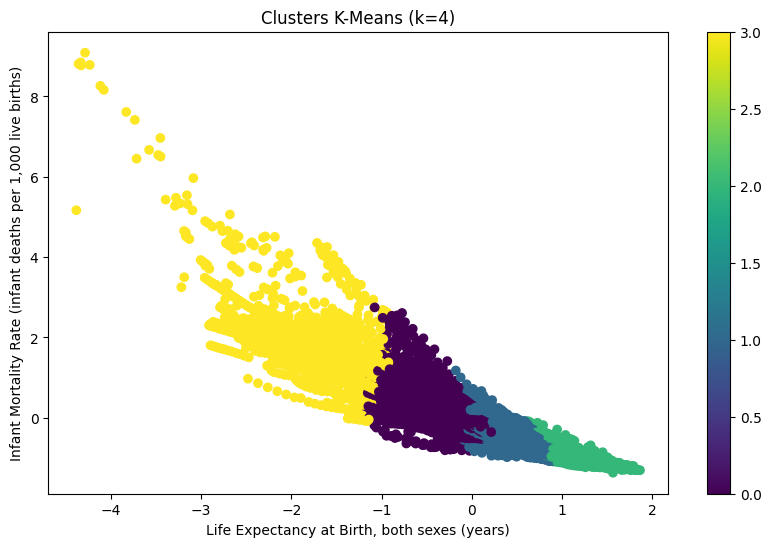

In [27]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(health_variables[0])
plt.ylabel(health_variables[1])
plt.title(f'Clusters K-Means (k={optimal_clusters})')
plt.show()

Avec reduction

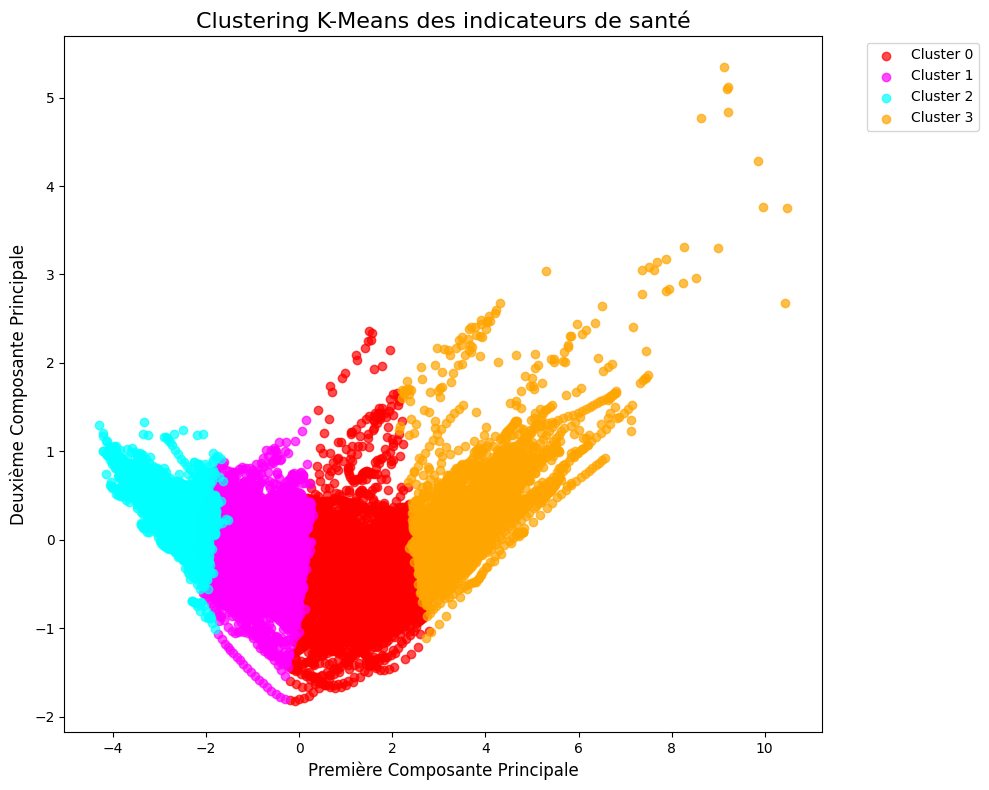

In [25]:

# Visualiser les clusters avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Palette de couleurs distinctes
distinct_colors = [
    '#FF0000', '#FF00FF', '#00FFFF',
    '#FFA500', '#800080', '#008000', '#000080', '#FFC0CB',
    '#A52A2A', '#808080'
]

plt.figure(figsize=(10, 8))

# Tracer chaque cluster avec une couleur distincte
for i in range(optimal_clusters):
    mask = clusters == i
    color = distinct_colors[i % len(distinct_colors)]
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label=f'Cluster {i}', alpha=0.7)

plt.title("Clustering K-Means des indicateurs de santé", fontsize=16)
plt.xlabel("Première Composante Principale", fontsize=12)
plt.ylabel("Deuxième Composante Principale", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [28]:

# Afficher les statistiques pour chaque cluster
print("Statistiques des clusters :")
for i in range(optimal_clusters):
    cluster_data = df[df['Health Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[health_variables].mean())
    print("\nNombre de régions dans ce cluster :", len(cluster_data))

Statistiques des clusters :

Cluster 0:
Life Expectancy at Birth, both sexes (years)                                                    58.613276
Infant Mortality Rate (infant deaths per 1,000 live births)                                     74.385819
Total Fertility Rate (live births per woman)                                                     5.515072
Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)                374.686568
Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)    167.665547
Life Expectancy at Age 65, both sexes (years)                                                   12.387400
dtype: float64

Nombre de régions dans ce cluster : 4553

Cluster 1:
Life Expectancy at Birth, both sexes (years)                                                    69.313472
Infant Mortality Rate (infant deaths per 1,000 live births)                                     27.889795
Total Fertility Rate (live births per woman